In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import random
import matplotlib.pyplot as plt
import numpy as np

manualSeed = 999
random.seed(manualSeed)
torch.manual_seed(manualSeed)


In [4]:
data_root_path = "./data"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 4

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 32

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1,2 hyperparam for Adam optimizers
beta_1=0.9
beta_2=0.999

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1


In [9]:
transform_cifar10 = transforms.Compose([
    transforms.Resize(image_size),
    transforms.RandomAffine(0, translate = (0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10_train = torchvision.datasets.CIFAR10(data_root_path, download=True,
                                             train=True, transform=transform_cifar10)
cifar10_test = torchvision.datasets.CIFAR10(data_root_path, download=True,
                                            train=False, transform=transform_cifar10)

trainloader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)
testloader = torch.utils.data.DataLoader(cifar10_test, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

Files already downloaded and verified
Files already downloaded and verified


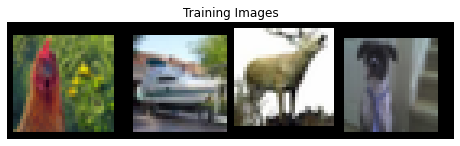

In [10]:

real_batch = next(iter(trainloader))

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
class Model(nn.Module):
    def __init__(self, w_shape):
        super(Model, self).__init__()

        w_init = np.linalg.qr(
            np.random.randn(*w_shape))[0].astype('float32') # * unpacks list to its elements

    def act_norm(self, s, x, b):
        return s * x + b

    def reverse_act_norm(self, s, y, b):
        return (y - b) / s

    def log_det_act_norm(self, h, w, s):
        return h * w * sum(np.log(np.abs(s)))
        